# Week13: CNN and RNN

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week13_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week13\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and Preprocess the Fashion-MNIST Dataset 

In [113]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [114]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [115]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [116]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [117]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [118]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [119]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

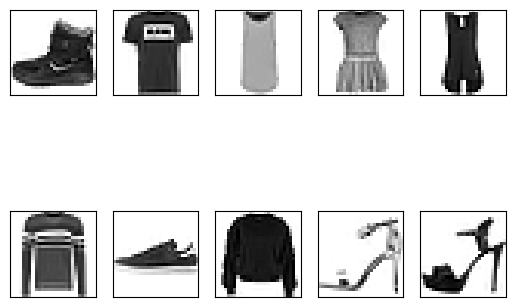

In [120]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model
![image.png](attachment:image.png)

In [121]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers
base_model = tf.keras.Sequential([
 layers.Conv2D(32, kernel_size=(3, 3), padding = "same", input_shape=(28, 28, 1), activation="relu"),
 layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
 layers.MaxPool2D(pool_size=2),
 layers.Flatten(),
 layers.Dense(128, activation="relu"),
 layers.Dense(10, activation="softmax")   
])


base_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1384576   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                      

### Compile the model

In [122]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Train the model

In [123]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.3474 - accuracy: 0.8744 - val_loss: 0.2570 - val_accuracy: 0.9063
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2146 - accuracy: 0.9210 - val_loss: 0.2295 - val_accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1618 - accuracy: 0.9392 - val_loss: 0.2234 - val_accuracy: 0.9221
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1225 - accuracy: 0.9542 - val_loss: 0.2290 - val_accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0904 - accuracy: 0.9666 - val_loss: 0.2393 - val_accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9761 - val_loss: 0.2863 - val_accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9822 - val_loss: 0.3148 - val_accurac

### Plot the loss

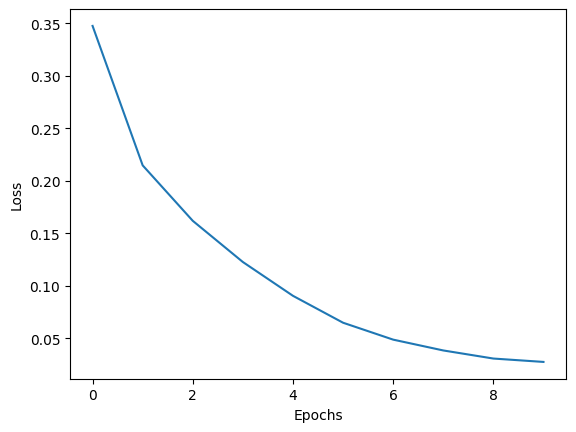

In [124]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [125]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9956
Train accuracy : 0.9956
313/313 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.9275
Test accuracy : 0.9275


### The model with dropout regularization
![image.png](attachment:image.png)

In [126]:
# Base CNN model + dropout with 0.5 before the last layer
dropout_model = tf.keras.Sequential([
 layers.Conv2D(32, kernel_size=(3, 3), padding = "same", input_shape=(28, 28, 1), activation="relu"),
 layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
 layers.MaxPool2D(pool_size=2),
 layers.Flatten(),
 layers.Dense(128, activation="relu"),
 layers.Dropout(.5),
 layers.Dense(10, activation="softmax")   
])


base_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1384576   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                      

### Compile the dropout model

In [127]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [128]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4540 - accuracy: 0.8385 - val_loss: 0.2997 - val_accuracy: 0.8939
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.8947 - val_loss: 0.2614 - val_accuracy: 0.9035
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2475 - accuracy: 0.9110 - val_loss: 0.2442 - val_accuracy: 0.9079
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2147 - accuracy: 0.9215 - val_loss: 0.2393 - val_accuracy: 0.9191
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1879 - accuracy: 0.9307 - val_loss: 0.2219 - val_accuracy: 0.9236
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1662 - accuracy: 0.9378 - val_loss: 0.2317 - val_accuracy: 0.9215
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1452 - accuracy: 0.9452 - val_loss: 0.2494 - val_accuracy

### Plot the loss

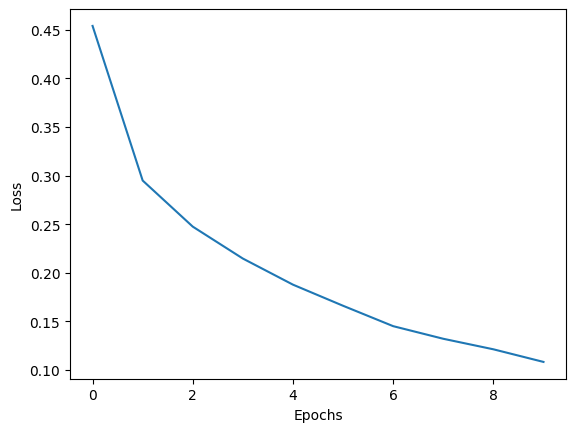

In [129]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [130]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9848
Train accuracy : 0.9848
313/313 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.9268
Test accuracy : 0.9268


### Plotting the learning curves

(0.0, 9.0)

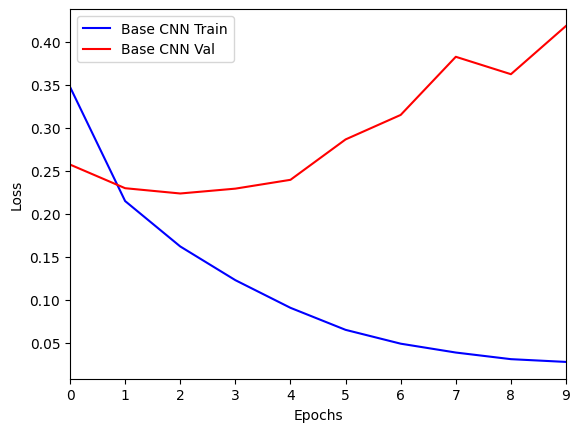

In [131]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

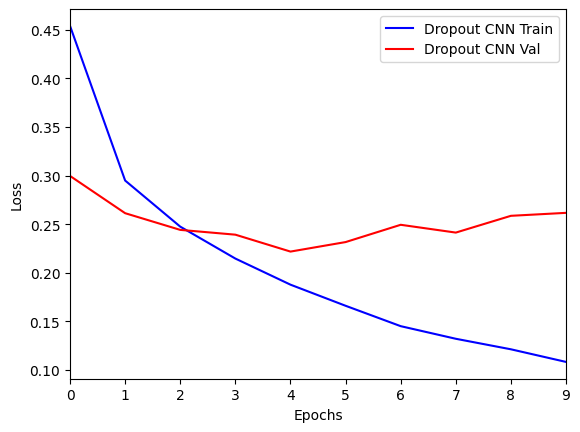

In [132]:
# plot the train/validation losses for each model
plt.plot(drop_history.epoch, drop_history.history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(drop_history.epoch, drop_history.history['val_loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

# 2. Recurrent Neural Networks

### Character-level Language Model with RNNs

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

### Load a text to use for training - "The Mysterious Island"

In [134]:
# Reading and processing text '1268-0.txt'
with open('1268-0.txt', 'r') as fp:
    text=fp.read()
    
# use main contents only 
start_indx = text.find('Chapter 1')
end_indx = text.find('End of the Project Gutenberg')
text = text[start_indx:end_indx]

print('Total length:', len(text))

Total length: 1130598


In [135]:
# Check first 500 characters
print(text[:500])

Chapter 1

“Are we rising again?” “No. On the contrary.” “Are we descending?”
 “Worse than that, captain! we are falling!” “For Heaven’s sake heave out
the ballast!” “There! the last sack is empty!” “Does the balloon rise?”
 “No!” “I hear a noise like the dashing of waves. The sea is below the
car! It cannot be more than 500 feet from us!” “Overboard with every
weight! ... everything!”

Such were the loud and startling words which resounded through the air,
above the vast watery desert of the Pa


In [136]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']
Number of unique characters: 85


### Encode the text into integers

In [137]:
# Creating a mapping from characters to indices, and vice versa
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

print(char2idx['A'])
print(idx2char[24])

29
9


In [138]:
# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

# Show encoded text[11:25]
print('Original text :', text[11:25])
print('Encoded text :', encoded_text[11:25])

Original text : “Are we rising
Encoded text : [83 29 72 59  1 77 59  1 72 63 73 63 68 61]


### Create TensorFlow Dataset
- from_tensor_slices() : Creates a Dataset whose elements are slices of the given tensors.
- .as_numpy_iterator() : Returns an iterator which converts all elements of the dataset to numpy.
- .take(*count*) : Creates a `Dataset` with at most *count* elements from this dataset.

In [139]:
# example of TensorFlow dataset
ds = tf.data.Dataset.from_tensor_slices([10, 20, 30])
ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [140]:
# example of TensorFlow dataset
for item in ds:
    print(item)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(30, shape=(), dtype=int32)


In [141]:
# example of dataset to numpy iterator
for element in ds.as_numpy_iterator():
    print(element)

np.array(list(ds.as_numpy_iterator())).shape

10
20
30


(3,)

In [142]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

# check first 3 elements
for item in ds.take(3):
    print(item.numpy())

31
62
55


### Make character sequences from the dataset
- .batch(*count*) : Combines consecutive elements of dataset into batches.
- **sequences** : sequence of fixed size inputs. `tf.data.Dataset` object, shape = (*, 41)


![image-2.png](attachment:image-2.png)

In [143]:
# example of making sequences
seq_length = 3
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7])
ds_sequences = ds.batch(seq_length, drop_remainder=True)

for item in ds_sequences:
    print(item.numpy())

[1 2 3]
[4 5 6]


In [144]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

In [145]:
# check first 2 elements
for item in ds_sequences.take(2):
    print(item.numpy())
    
for item in ds_sequences.take(2):
    print(repr(''.join(idx2char[item.numpy()])))

[31 62 55 70 74 59 72  1 16  0  0 83 29 72 59  1 77 59  1 72 63 73 63 68
 61  1 55 61 55 63 68 28 84  1 83 42 69 13  1 43 68]
[ 1 74 62 59  1 57 69 68 74 72 55 72 79 13 84  1 83 29 72 59  1 77 59  1
 58 59 73 57 59 68 58 63 68 61 28 84  0  1 83 51 69]
'Chapter 1\n\n“Are we rising again?” “No. On'
' the contrary.” “Are we descending?”\n “Wo'


In [146]:
# Check the shape of ds_sequences
np.array(list(ds_sequences.as_numpy_iterator())).shape

(27575, 41)

### Create the training sequences (input, target)
- **pair sequences** : sequences of inputs and targets. `tf.data.Dataset` object, shape = (*, 2, 40) 
   - .map(map_func) : Maps map_func across the elements of dataset.

In [147]:
# map_func
def split_input_target(sequence):
    
    # input text (sequence[:-1]) is shifted to form the target text (sequence[1:])
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

In [148]:
# Check first 2 elements 
for input_ex, target_ex in  ds_pair_sequences.take(2):
    print ('Input : ', repr(''.join(idx2char[input_ex.numpy()])))
    print ('Target :', repr(''.join(idx2char[target_ex.numpy()])))

Input :  'Chapter 1\n\n“Are we rising again?” “No. O'
Target : 'hapter 1\n\n“Are we rising again?” “No. On'
Input :  ' the contrary.” “Are we descending?”\n “W'
Target : 'the contrary.” “Are we descending?”\n “Wo'


In [149]:
# Check the shape of ds_pair_sequences
np.array(list(ds_pair_sequences.as_numpy_iterator())).shape

(27575, 2, 40)

### Create training batches
- **dataset** : batched training dataset. `tf.data.Dataset` object, shape = (*, 2, 64, 40)

In [150]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [151]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

(430, 2, 64, 40)

### Build the model

- 3 layers are used to define this model
    1. `tf.keras.layers.Embedding`: The input layer, A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions
    2. `tf.keras.layers.SimpleRNN`: A RNN with size `units=rnn_units`
    3. `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs

![image.png](attachment:image.png)

In [152]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 512

In [153]:
# RNN model with 3 layers 
#    1. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim, 
#                        batch_input_shape=[batch_size, None]
#    2. RNN layer, rnn_units, 
#                        return_sequences=True, stateful=True,
#    3. Dense layer, vocab_size
#
#    stateful=True : the last state for each sample at index i in a batch 
#                    will be used as initial state for the sample of index i in the following batch
#                    batch_input_shape must be specified to use stateful=True

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, batch_input_shape=[batch_size, None]),
        layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True,),
        layers.Dense(vocab_size)
    ])

    
    return model

In [154]:
# Build the model. specify vocab_size, embedding_dim, rnn_units, batch_size
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (64, None, 256)           21760     
                                                                 
 simple_rnn_2 (SimpleRNN)    (64, None, 512)           393728    
                                                                 
 dense_18 (Dense)            (64, None, 85)            43605     
                                                                 
Total params: 459,093
Trainable params: 459,093
Non-trainable params: 0
_________________________________________________________________


### Check the dimensions of input, output, prediction

In [155]:
# Run the (not yet trained) model to see that it behaves as expected
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)

# Check the shape of the input, output, prediction
print("Input batch:     ", input_example_batch.shape)
print("Output batch:    ", target_example_batch.shape)
print("Batch prediction:", example_batch_predictions.shape)

Input batch:      (64, 40)
Output batch:     (64, 40)
Batch prediction: (64, 40, 85)


In [156]:
# Example generation. To get actual characters, we need to sample from the 79 prediction probability distribution
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

# Sampled next character indexes 
sampled_indices

array([34, 31, 20, 40,  4, 18, 69,  3, 51, 26, 71,  0, 19,  3, 67, 63, 81,
       43,  0, 50, 60, 57,  9, 10, 15, 60, 23, 73, 37, 42, 75, 24, 77, 27,
       49,  7, 84, 18, 80,  9])

### Train the model

In [157]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = tf.keras.optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [158]:
# Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_rnns_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_rnns_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [159]:
# Train the model with dataset. 20 epochs. specify callbacks=[ckpt_callback]
EPOCHS=20
rnn_history = model.fit(dataset, epochs=EPOCHS, callbacks=[ckpt_callback])

Epoch 1/20
430/430 [==============================] - 22s 47ms/step - loss: 2.1530
Epoch 2/20
430/430 [==============================] - 18s 42ms/step - loss: 1.6714
Epoch 3/20
430/430 [==============================] - 17s 40ms/step - loss: 1.5225
Epoch 4/20
430/430 [==============================] - 17s 40ms/step - loss: 1.4477
Epoch 5/20
430/430 [==============================] - 17s 39ms/step - loss: 1.4006
Epoch 6/20
430/430 [==============================] - 18s 41ms/step - loss: 1.3681
Epoch 7/20
430/430 [==============================] - 17s 39ms/step - loss: 1.3440
Epoch 8/20
430/430 [==============================] - 18s 41ms/step - loss: 1.3231
Epoch 9/20
430/430 [==============================] - 17s 40ms/step - loss: 1.3091
Epoch 10/20
430/430 [==============================] - 18s 42ms/step - loss: 1.2957
Epoch 11/20
430/430 [==============================] - 18s 41ms/step - loss: 1.2850
Epoch 12/20
430/430 [==============================] - 18s 41ms/step - loss: 1.2739
E

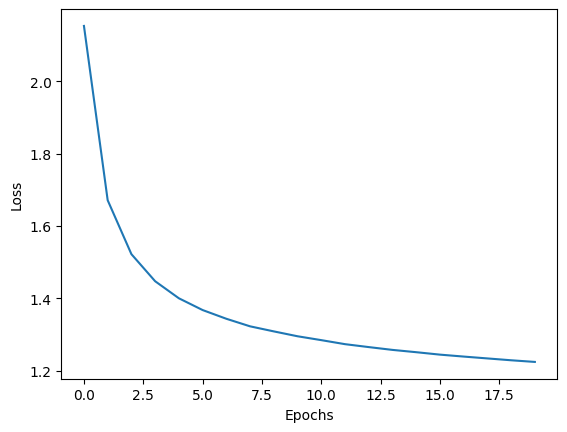

In [160]:
# Plot the loss
plt.plot(rnn_history.epoch, rnn_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [161]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

'./training_rnns_ckpts/ckpt_rnns_20'

In [162]:
# To run the model with one sample(batch_size = 1),
# We rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [163]:
# Check the model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (1, None, 256)            21760     
                                                                 
 simple_rnn_3 (SimpleRNN)    (1, None, 512)            393728    
                                                                 
 dense_19 (Dense)            (1, None, 85)             43605     
                                                                 
Total params: 459,093
Trainable params: 459,093
Non-trainable params: 0
_________________________________________________________________


![image.png](attachment:image.png)

In [164]:
# The prediction loop
def generate_text(model, start_string, n_generate, display):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):
        if(display): print("Input:", input_eval.numpy())
        
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        if(display): print("Prediction:", predicted_id)

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [165]:
# Generate text from start string "It was "
# Test 10 generation with display of input/prediction 
print(generate_text(model, start_string="It was ", n_generate=10, display=1))

Input: [[37 74  1 77 55 73  1]]
Prediction: 74
Input: [[74]]
Prediction: 62
Input: [[62]]
Prediction: 59
Input: [[59]]
Prediction: 72
Input: [[72]]
Prediction: 59
Input: [[59]]
Prediction: 60
Input: [[60]]
Prediction: 69
Input: [[69]]
Prediction: 72
Input: [[72]]
Prediction: 59
Input: [[59]]
Prediction: 1
It was therefore 


In [166]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was ", n_generate=1000, display=0))

It was Lindly, she was a vessel ascertain possessed or other nothing to be e the eruption! The certain emergen sort of liferofo, or contact Lide decided
to the land, which could permittens you carry
for any in” and Gideon Spilett, as if it is companions to ite House with stones must remain rock and the crater would be l in 90ce of it issuers of the tabitate too wait from an instant in the terrible ‘Dung.

“Have you thirt could you Lake Grant things no enacrow!”

“What is not agreement.

Octable fire, but the bout
to not inclear and gittle or
it each of exposition. Alts of my doing
chainhs, the last onagge the matter, as they must not docen informer use, and the cast of this haiment, after a horward
This point on Lincoln Island, consequence of theser,
contentence, was not extremity of the trees soir little, a form the colonists leg is, us.”

“As to the laws, and I shall how
bark of the little regions they were
extended to distrvipland. The inexpecember still five intelligenats were not 

In [167]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was ", n_generate=1000, display=1))

Input: [[37 74  1 77 55 73  1]]
Prediction: 70
Input: [[70]]
Prediction: 75
Input: [[75]]
Prediction: 72
Input: [[72]]
Prediction: 73
Input: [[73]]
Prediction: 75
Input: [[75]]
Prediction: 59
Input: [[59]]
Prediction: 58
Input: [[58]]
Prediction: 1
Input: [[1]]
Prediction: 74
Input: [[74]]
Prediction: 62
Input: [[62]]
Prediction: 59
Input: [[59]]
Prediction: 0
Input: [[0]]
Prediction: 70
Input: [[70]]
Prediction: 72
Input: [[72]]
Prediction: 69
Input: [[69]]
Prediction: 57
Input: [[57]]
Prediction: 59
Input: [[59]]
Prediction: 73
Input: [[73]]
Prediction: 73
Input: [[73]]
Prediction: 1
Input: [[1]]
Prediction: 74
Input: [[74]]
Prediction: 69
Input: [[69]]
Prediction: 1
Input: [[1]]
Prediction: 74
Input: [[74]]
Prediction: 62
Input: [[62]]
Prediction: 59
Input: [[59]]
Prediction: 1
Input: [[1]]
Prediction: 68
Input: [[68]]
Prediction: 69
Input: [[69]]
Prediction: 72
Input: [[72]]
Prediction: 74
Input: [[74]]
Prediction: 62
Input: [[62]]
Prediction: 11
Input: [[11]]
Prediction: 1
Input: 

---

# Quiz 1 : Image Classification Model on the CIFAR-10
- Build the Convolutional Neural Networks for CIFAR-10 image classification task
    - Build the model following the bellow model summary
    - Apply the dropout regularization to the model
- Compare the performance of the model built last week

### Import TensorFlow and other libraries

In [200]:
import tensorflow as tf
from tensorflow.keras import datasets, models
import matplotlib.pyplot as plt

### Load the CIFAR-10 Dataset

In [201]:
# load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [202]:
# Check the shape of dataset
train_images.shape

(50000, 32, 32, 3)

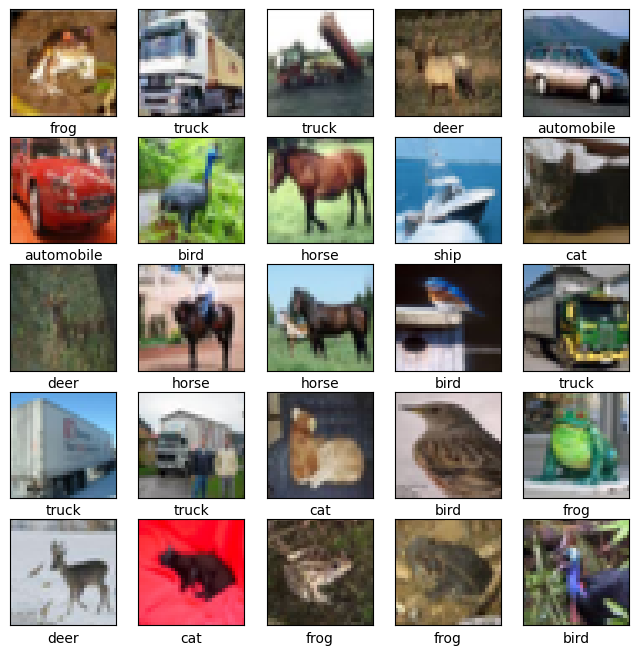

In [203]:
# Show the first 25 image data with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the CNN model

In [204]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding = "same", input_shape = (32, 32, 3), activation="relu"
#       and Max pooling of size 2
#    2. 64 3x3 filters, activation="relu"
#       and Max pooling of size 2
# and 2 dense layers 
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers

cifar_model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])


In [205]:
# Show the model summary
cifar_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 3136)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [206]:
# Compile the model(set optimizer, loss function, and metrics)
cifar_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Train the model

In [207]:
# train the CNN model for 20 epochs
cifar_history = cifar_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5964 - accuracy: 0.4190 - val_loss: 1.2659 - val_accuracy: 0.5441
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2635 - accuracy: 0.5504 - val_loss: 1.0778 - val_accuracy: 0.6178
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1393 - accuracy: 0.5974 - val_loss: 1.1196 - val_accuracy: 0.6082
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0565 - accuracy: 0.6299 - val_loss: 0.9609 - val_accuracy: 0.6606
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9934 - accuracy: 0.6494 - val_loss: 0.9308 - val_accuracy: 0.6748
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9422 - accuracy: 0.6667 - val_loss: 0.8892 - val_accuracy: 0.6912
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8935 - accuracy: 0.6871 - val_loss: 0.8675 - val_accuracy

### Plot the learning curves

(0.0, 19.0)

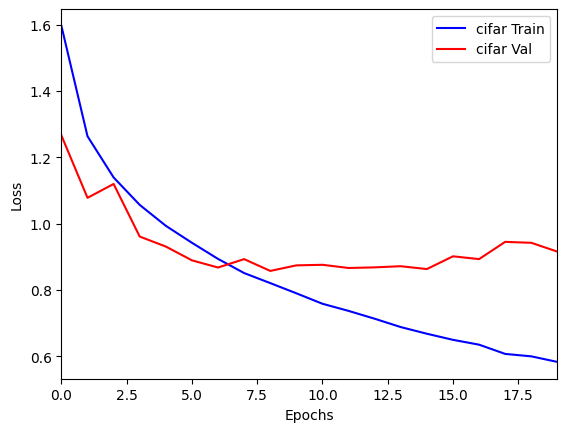

In [208]:
# plot the train/validation losses for each model
plt.plot(cifar_history.epoch, cifar_history.history['loss'], color='blue', label='cifar Train')
plt.plot(cifar_history.epoch, cifar_history.history['val_loss'], color='red', label='cifar Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(cifar_history.epoch)])

In [209]:
# Train and test accuracy. use evaluate()
loss, acc = cifar_model.evaluate(train_images, train_labels)
print('Train accuracy : %.4f' % acc)
loss, acc = cifar_model.evaluate(test_images, test_labels)
print('Test accuracy : %.4f' % acc)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.8849
Train accuracy : 0.8849
313/313 [==============================] - 1s 3ms/step - loss: 0.9154 - accuracy: 0.7056
Test accuracy : 0.7056


---

# Quiz 2 : Character-level Language Model
- Generate texts like Shakespeare's sonnet
- Build the Character-level Language Model with LSTM
- Try various sequence lengths for training, and see their effects on the results

### Load and preprocess the Shakespeare dataset

In [178]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Load whole text file as a string, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text:', len(text))

Length of text: 1115394


In [179]:
# Check first 500 characters
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [180]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 65


### Encode the text into integers

In [181]:
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

In [182]:
### Create TensorFlow Dataset

In [183]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

### Make character sequences from the dataset

In [184]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

### Create the training sequences (input, target)

In [185]:
# map_func
def split_input_target(sequence):
    
    # input text is shifted to form the target text 
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

### Create training batches
- **dataset** : batched training dataset. shape = (*, 2, 64, 40)

In [186]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [187]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

(425, 2, 64, 40)

### Build the model
- 3 layers are used to define this model: Embedding, LSTM, and Dense

In [188]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 128

# Number of LSTM units
lstm_units = 256

In [189]:
# LSTM model with 3 layers 
#    1. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim, 
#                        batch_input_shape=[batch_size, None]
#    2. LSTM layer, rnn_units, 
#                   return_sequences=True, stateful=True,
#    3. Dense layer, vocab_size

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, batch_input_shape=[batch_size, None]),
        layers.LSTM(rnn_units, return_sequences=True, stateful=True,),
        layers.Dense(vocab_size)
    ])
    
    
    return model

In [190]:
# Build the model 
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=lstm_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (64, None, 128)           8320      
                                                                 
 lstm_2 (LSTM)               (64, None, 256)           394240    
                                                                 
 dense_22 (Dense)            (64, None, 65)            16705     
                                                                 
Total params: 419,265
Trainable params: 419,265
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [191]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = tf.keras.optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [192]:
# 2. Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_lstm_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_lstm_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [193]:
# Train the model with dataset. 20 epochs
EPOCHS=20
lstm_history = model.fit(dataset, epochs=EPOCHS, callbacks=[ckpt_callback])

Epoch 1/20
425/425 [==============================] - 8s 14ms/step - loss: 2.5048
Epoch 2/20
425/425 [==============================] - 6s 13ms/step - loss: 1.9891
Epoch 3/20
425/425 [==============================] - 4s 10ms/step - loss: 1.8294
Epoch 4/20
425/425 [==============================] - 6s 13ms/step - loss: 1.7334
Epoch 5/20
425/425 [==============================] - 4s 10ms/step - loss: 1.6694
Epoch 6/20
425/425 [==============================] - 4s 10ms/step - loss: 1.6234
Epoch 7/20
425/425 [==============================] - 6s 13ms/step - loss: 1.5889
Epoch 8/20
425/425 [==============================] - 5s 11ms/step - loss: 1.5609
Epoch 9/20
425/425 [==============================] - 6s 13ms/step - loss: 1.5395
Epoch 10/20
425/425 [==============================] - 4s 10ms/step - loss: 1.5214
Epoch 11/20
425/425 [==============================] - 4s 10ms/step - loss: 1.5063
Epoch 12/20
425/425 [==============================] - 6s 13ms/step - loss: 1.4922
Epoch 13/20
4

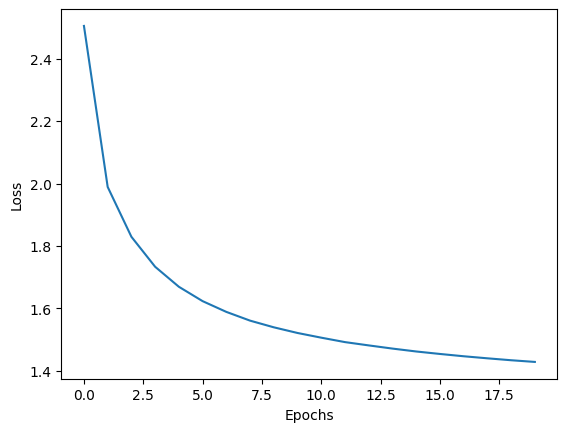

In [194]:
# plot the loss
plt.plot(lstm_history.epoch, lstm_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [195]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

'./training_lstm_ckpts/ckpt_lstm_20'

In [196]:
# Rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, lstm_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [197]:
# Check the model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (1, None, 128)            8320      
                                                                 
 lstm_3 (LSTM)               (1, None, 256)            394240    
                                                                 
 dense_23 (Dense)            (1, None, 65)             16705     
                                                                 
Total params: 419,265
Trainable params: 419,265
Non-trainable params: 0
_________________________________________________________________


In [198]:
# The prediction loop
def generate_text(model, start_string, n_generate):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):      
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [199]:
# Generate 1000 character text from start string "All: "
generate_text(model=model, start_string = "All: ", n_generate=1000)

"All: I do turner the is--I saw the frief and signior housand of this foul way,\nHither is your charge?\n\nFirst Somerate:\nNow, you have virtuous pardon it.\n\nGREMIO:\nMust not thy corrupt you speak of this commands with our obght your house I do tolce out,\nBut sumpry: 'tis what hallow?\n\nGONZALO:\nWhy, that's a reopen how do.\n\nTRANIO:\nI thoughts o'ency ship!\nWoet thou, and I he, all the plouds are, my lord.\n\nVINCENTIO:\nApon! Go with thems; why had nor I tag\nFrom the wrinking's night, for what what wides of tell'd and knough to be so meral sast to break his loath!\n\nCANTIO:\nI have meature, or Peterutio! say most then more; which comput king of man affected:\nOuble, dram? Thus I be heaven?\n\nMIRANDA:\nHortensio, neat my sweet my fie, you laugh, stock yet thou hast underlanded, master of your name.\n\nPETRUCHIO:\nNow, get me not else feather;\nI part to make thee miscrowdry against you hand.\n\nPETRUCHIO:\nAnd, Angelor, Petruchio, good 'Lo:\nWhat, how must I no comforted s